In [24]:
import pandas as pd
import glob
import re
from functools import reduce

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from collections import Counter

import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [12]:
all_files=glob.glob("./data_list/my*.xls")

In [13]:
all_files_data=[]

In [14]:
for file in all_files : 
    data_frame = pd.read_excel(file)
    all_files_data.append(data_frame)
print(len(all_files_data))

10


In [6]:
all_files_data_concat = pd.concat(all_files_data, axis=0, ignore_index=True)
all_files_data_concat

,Unnamed: 0,번호,제목,저자,출판사,출판일
0,NaN,1,Guest Editorial: Big Media Data: Understanding...,"Wang, J.; Qi, G.; Sebe, N.; Aggarwal, C. C.",unknown,2015
1,NaN,2,Guest Editorial: Big Scholar Data Discovery an...,"Lin, Y.; Tong, H.; Tang, J.; Candan, K. S.",unknown,2016
2,NaN,3,Guest Editorial: Big Data Analytics and the Web,"Sheng, M.; Vasilakos, A. V.; Yu, Q.; You, L.",unknown,2016
3,NaN,4,Parallel computing for preserving privacy usin...,"Yaji, Sharath; Neelima, B.",Inderscience,2018
4,NaN,5,NoSQL databases for big data,"Oussous, Ahmed; Benjelloun, Fatima-Zahra; Lahc...",Inderscience,2017
...,...,...,...,...,...,...
995,NaN,96,Guest Editorial: Big Media Data: Understanding...,"Wang, J.; Qi, G.; Sebe, N.; Aggarwal, C.",unknown,2017
996,NaN,97,Guest Editorial: Big Scholar Data Discovery an...,"Lin, Y.; Tong, H.; Tang, J.; Candan, K. S.",unknown,2017
997,NaN,98,Guest Editorial: Big Media Data: Understanding...,"Wang, J.; Qi, G.; Sebe, N.; Aggarwal, C. C.",unknown,2016
998,NaN,99,Speed Up Big Data Analytics by Unveiling the S...,"Wang, J.; Zhang, X.; Yin, J.; Wang, R.; Wu, H....",unknown,2018


In [8]:
all_title = all_files_data_concat['제목']
all_title

0      Guest Editorial: Big Media Data: Understanding...
1      Guest Editorial: Big Scholar Data Discovery an...
2        Guest Editorial: Big Data Analytics and the Web
3      Parallel computing for preserving privacy usin...
4                           NoSQL databases for big data
                             ...                        
995    Guest Editorial: Big Media Data: Understanding...
996    Guest Editorial: Big Scholar Data Discovery an...
997    Guest Editorial: Big Media Data: Understanding...
998    Speed Up Big Data Analytics by Unveiling the S...
999          Architecting Time-Critical Big-Data Systems
Name: 제목, Length: 1000, dtype: object

In [15]:
# iterator data(반복자) : list, Series, tuple
type(all_title)

pandas.core.series.Series

In [16]:
stopWords = set(stopwords.words("english"))
lemma = WordNetLemmatizer()

In [17]:
words=[]

In [28]:
for title in all_title:
    EnWords = re.sub(r"[^a-zA-Z]+"," ", str(title))
    # print(EnWords)
    EnWordsToken = word_tokenize(EnWords.lower())
    # print(EnWordsToken)
    EnWordsTokenStop = [w for w in EnWordsToken if w not in stopWords] # 익명함수, 클로저
    # 클로저의 결과는 iterable
    # print(EnWordsTokenStop)
    
    # def call(EnWordsToken):
    #     result = []
    #     for w in EnWordsToken :
    #         if w not in stopWords:
    #             result.append(w)
    #     return result
    
    EnWordsTokenStopLemma = [lemma.lemmatize(w) for w in EnWordsTokenStop]
    # print(EnWordsTokenStopLemma)
    
    # def call2(var) :
    #     result2=[]
    #     for w2 in EnwordsTokenStop : 
    #         result2.append(lemma.lemmatize(w))
    #     return result2
    
    words.append(EnWordsTokenStopLemma)
    

In [29]:
words2 = reduce(lambda x, y : x+y, words)
print(words2[:10])

['guest', 'editorial', 'big', 'medium', 'data', 'understanding', 'search', 'mining', 'part', 'guest']


In [36]:
count = Counter(words2)
count

Counter({'guest': 12,
         'editorial': 17,
         'big': 1354,
         'medium': 11,
         'data': 1645,
         'understanding': 11,
         'search': 7,
         'mining': 40,
         'part': 1,
         'scholar': 3,
         'discovery': 13,
         'collaboration': 5,
         'analytics': 137,
         'web': 9,
         'parallel': 5,
         'computing': 25,
         'preserving': 2,
         'privacy': 17,
         'using': 57,
         'k': 7,
         'anonymisation': 1,
         'algorithm': 17,
         'nosql': 4,
         'database': 11,
         'computation': 2,
         'migration': 4,
         'new': 38,
         'approach': 44,
         'execute': 1,
         'bioinformatics': 2,
         'workflow': 3,
         'towards': 12,
         'real': 14,
         'time': 17,
         'platform': 19,
         'health': 37,
         'application': 25,
         'accurate': 3,
         'distributed': 18,
         'cluster': 2,
         'analysis': 67,
         

In [31]:
# 개수 1개 이하인 단어 없애기

word_count = dict()

In [32]:
# count.most_common(5)

[('data', 1645),
 ('big', 1354),
 ('analytics', 137),
 ('analysis', 67),
 ('based', 62)]

In [37]:
for tag, counts in count.most_common(50) : 
    if (len(str(tag))>1):
        word_count[tag] = counts
        print("%s : %d" % (tag,counts))

data : 1645
big : 1354
analytics : 137
analysis : 67
based : 62
using : 57
system : 50
science : 50
management : 48
challenge : 47
approach : 44
mining : 40
new : 38
research : 38
health : 37
model : 37
cloud : 34
smart : 34
learning : 33
opportunity : 31
processing : 30
technology : 28
small : 27
framework : 26
information : 26
computing : 25
application : 25
driven : 24
social : 24
issue : 24
quality : 23
network : 23
deal : 23
knowledge : 22
efficient : 22
review : 22
use : 22
era : 22
healthcare : 21
storage : 21
service : 21
perspective : 21
open : 20
platform : 19
survey : 19
making : 19
process : 19
distributed : 18
large : 18
environment : 18


In [38]:
del word_count['big']
del word_count['data']

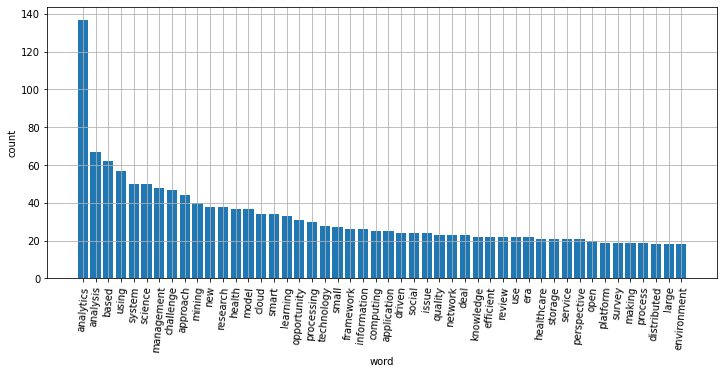

In [41]:
plt.figure(figsize=(12,5))
plt.xlabel("word")
plt.ylabel("count")
plt.grid(True)

sorted_keys = sorted(word_count, key=word_count.get, reverse=True)
sorted_values = sorted(word_count.values(), reverse=True)

plt.bar(range(len(word_count)), sorted_values, align='center')
plt.xticks(range(len(word_count)), list(sorted_keys), rotation="85")

plt.show()

In [42]:
## dictionary 연습

dict2 = {"name" : ["홍길동", "김길동", "송길동"], 'age':[100,200,300] }

In [43]:
dict2.keys()

dict_keys(['name', 'age'])

In [44]:
dict2.values()

dict_values([['홍길동', '김길동', '송길동'], [100, 200, 300]])

In [45]:
dict3 = {"분석":245, "챌린지" :100}

In [48]:
keys3 = dict3.keys()
keys3

dict_keys(['분석', '챌린지'])

In [47]:
dict3.values()

dict_values([245, 100])

In [49]:
list_keys3 = list(keys3)
list_keys3

['분석', '챌린지']

In [50]:
sorted(list_keys3, reverse=True)

['챌린지', '분석']

In [52]:
list_values3 = list(dict3.values())
sorted(list_values3, reverse=True)

[245, 100]